# libraries

In [46]:
import os
import pandas as pd
import numpy as np
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense , Input,Lambda
from tensorflow.keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import LSTM, Lambda, Dense, Permute, Multiply, RepeatVector, Activation, add, Conv2D, GlobalAveragePooling2D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Data Preparation

In [47]:
fullpath = '/kaggle/input/crimeucfdataset/'
os.listdir(fullpath)

['anomaly', 'Anomaly_Dataset']

In [48]:
p = os.path.join(fullpath,'Anomaly_Dataset')

In [49]:
p1 = os.path.join(p,'Anomaly_Videos')
new_path=[]
for i in os.listdir(p1):
    if i[-3:] =='txt':
        pass
    else:
        new_path.append(i)
        

In [50]:
new_path

['Anomaly-Videos-Part-2', 'Anomaly-Videos-Part-1', 'Normal-Videos-Part-1']

In [51]:
p_an1 = os.path.join(p1,new_path[0])
p_an2 = os.path.join(p1,new_path[1])
p_no = os.path.join(p1,new_path[2])

In [52]:
p_an2

'/kaggle/input/crimeucfdataset/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1'

In [53]:
import os
import glob
import pandas as pd

# Set the directory paths and class names
dir_path_1 = p_an1
dir_path_2 = p_an2
class_names_1 = [ "Explosion","Fighting"]
class_names_2 = ["Abuse","Assault"]

# Initialize empty lists for the video paths and labels
video_paths = []
labels = []

# Iterate over the first directory and class names to retrieve the video paths and labels
for class_name in class_names_1:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_1, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Iterate over the second directory and class names to retrieve the video paths and labels
for class_name in class_names_2:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_2, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Create a dataframe with the video paths and labels
df = pd.DataFrame({"video_path": video_paths, "label": labels})

# Print the dataframe
print(df)

                                            video_path      label
0    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
1    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
2    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
3    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
4    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
..                                                 ...        ...
195  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
196  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
197  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
198  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
199  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault

[200 rows x 2 columns]


In [54]:
df['label'].value_counts()

Explosion    50
Fighting     50
Abuse        50
Assault      50
Name: label, dtype: int64

In [55]:
df = df.drop(index=df.iloc[:100].sample(n=50).index)
df

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
6,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
...,...,...
195,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
196,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
197,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
198,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault


In [56]:
video_paths = []
labels = []

# Get a list of file paths in the class subdirectory
file_paths = glob.glob(os.path.join(p_no, "*.mp4"))

# Append the file paths and class label to the lists
video_paths.extend(file_paths)
labels.extend(['Normal'] * len(file_paths))
# Create a new dataframe with the new video paths and labels
df_new = pd.DataFrame({"video_path": video_paths, "label": labels})

In [57]:
df_new

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
...,...,...
145,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
146,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
147,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
148,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [58]:
df_new = df_new.drop(index=df_new.sample(n=100).index)
df_new

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
9,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
12,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
15,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
19,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
23,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
27,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
29,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
30,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
35,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [59]:
All_Data =  pd.concat([df, df_new], ignore_index=True)
All_Data

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
...,...,...
195,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
196,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
197,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
198,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [60]:
df_shuffled = All_Data.sample(frac=1.0, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Abuse
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Fighting
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
...,...,...
195,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
196,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
197,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Abuse
198,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [61]:
label_map = {'Normal': 0, 'Abuse': 1, 'Assault': 2, 'Explosion': 3, 'Fighting': 4}
df_shuffled['label'] = df_shuffled['label'].map(label_map)

In [62]:
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,1
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,3
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,4
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
...,...,...
195,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
196,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,3
197,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,1
198,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0


In [63]:
# split data to train and val
from sklearn.model_selection import train_test_split

# Split the dataframe into training and testing sets
train_df, val_df = train_test_split(df_shuffled, test_size=0.2, random_state=42)


In [66]:
len(train_df)

160

In [67]:
len(val_df)

40

In [70]:

# Split the data into training, validation, and test sets
X_train , y_train, X_val, y_val = train_df['video_path'].tolist() , train_df['label'].tolist(),val_df['video_path'].tolist() , val_df['label'].tolist()

# Custom Generator

In [71]:
%%writefile mod_gen33.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=True, num_frames=30):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros((self.batch_size, self.num_classes))
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
            clip = np.concatenate(frames, axis=-1)  # concatenate RGB channels
          
            clip_shape = clip.shape
            clip = clip.transpose((1, 2, 3, 0))
            X[i,:,:,:,:] = clip
            #print(X)
            y[i,] = to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X, y

    def get_frames(self, video_path):
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
          # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      #print("total_frames:",total_frames)
      # Calculate the time interval between frames
        time_interval = total_frames / 3 / self.num_frames
      #print("time_interval:",time_interval)
        clips=[]
       # Sample frames at a fixed time interval
        frames = []
        for i in range(self.num_frames):
        # Calculate the frame index based on the time interval
            frame_index = int(i * time_interval)

        # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
              # Read and decode the frame
                ret, frame = cap.read()

              # Append the frame to the list of frames
                if ret==False:
                        break

                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame - mean) / std
                frames.append(frame)
        avg_resized_frames = []
        r_frames = []
        g_frames = []
        b_frames = []
        for af in frames:
            rsz_f = cv2.resize(af, (self.frame_size[0], self.frame_size[1]))
            r_frames.append(rsz_f[:,:,0])
            g_frames.append(rsz_f[:,:,1])
            b_frames.append(rsz_f[:,:,2])

        avg_resized_frames.append(r_frames)
        avg_resized_frames.append(g_frames)
        avg_resized_frames.append(b_frames)

        clip=np.asarray(avg_resized_frames)

        clips.append(clip)
        return clips

Writing mod_gen33.py


In [72]:
from mod_gen33 import VideoDataGenerator


In [73]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)

In [74]:
X_batch, y_batch = train_generator[0]


In [75]:
X_batch.shape

(32, 30, 224, 224, 3)

In [76]:
X_batch[0][0][0][0]

array([-0.42255254, -0.39986338, -0.38766463])

In [77]:
y_batch.shape

(32, 5)

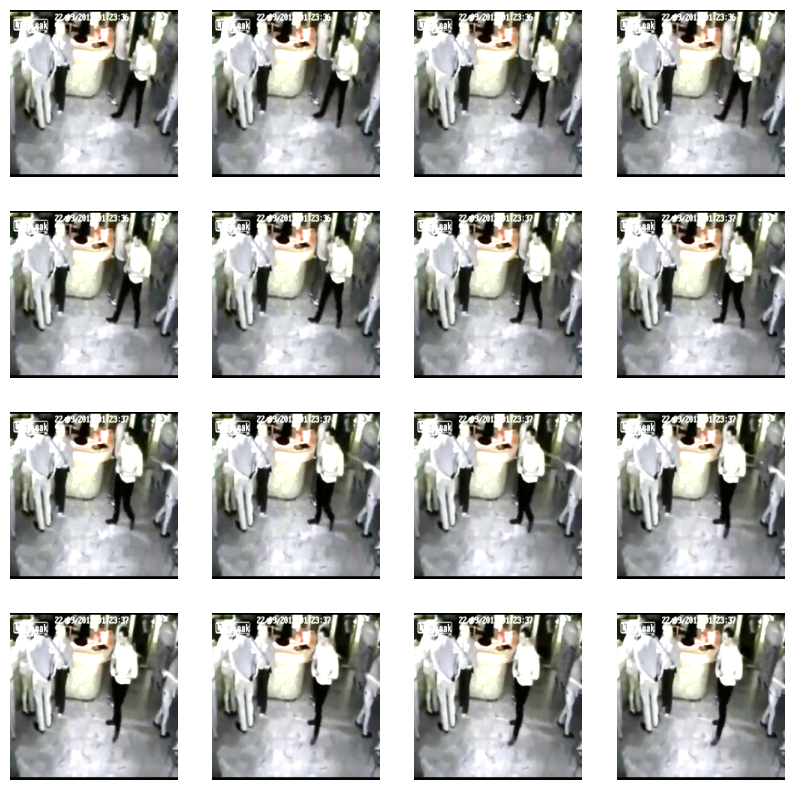

In [78]:
import matplotlib.pyplot as plt
# print the all 16 frames for first video
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    # Get the i-th frame tensor and convert it to a numpy array
    frame_tensor = t[i, :, :, :] /255 # shape = (3,112,112)  # loop on frame?? 16
    #print(frame_tensor.shape)
    # Plot the frame using imshow
    ax.imshow(frame_tensor)  #  shape transpose
    ax.set_axis_off()

plt.show()

# Build Model 

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Reshape, Lambda, Conv2D
from tensorflow.keras.layers import DepthwiseConv2D, BatchNormalization, Add, Activation, GlobalAveragePooling2D,TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

def build_model():
    # Create input layer for sequence of frames
    frames_input = Input(shape=(30, 224, 224, 3))

    # Create MobileNetV2 model without the final classification layers
    mobilenet_model = MobileNetV2(weights='/kaggle/input/wieght/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5', include_top=False, pooling='avg')

   # set all layers in the pre-trained MobileNetV2 model to non-trainable
    for layer in mobilenet_model.layers:
        layer.trainable = False

    # get the output from the pre-trained MobileNetV2 model for each frame
    frames_output = []
    for i in range(30):
        frame = frames_input[:, i, :, :, :]
        frame_output = mobilenet_model(frame)
        frames_output.append(frame_output)
    #print(len(frames_output))
    #print(frames_output)
    # concatenate the output from each frame
    aggregated_output = tf.concat(frames_output, axis=0)
    #print(aggregated_output.shape)

    # reshape the output to have a shape of (1, 1, 1280)
    aggregated_output = Reshape((1, 1, 1280))(aggregated_output)    
    #print(aggregated_output.shape)

    # apply a convolutional layer to the aggregated output
    aggregated_output = Conv2D(filters=1280, kernel_size=1, activation='relu')(aggregated_output)
    # reshape the output using a Lambda layer
    aggregated_output = Lambda(lambda x: K.reshape(x, (-1, 30, 1280)))(aggregated_output)

    # apply a fully connected layer with 1000 units
    aggregated_output = Dense(units=1000, activation='relu')(aggregated_output)
    #print(aggregated_output.shape)
    x = aggregated_output
    # Apply batch normalization to the inputs of the residual LSTM
    x = BatchNormalization()(x)

    # Apply a residual attention-based LSTM for sequence learning and recognition of anomalous activities
    for i in range(6):
        return_sequences = i < 5
        x_rnn = LSTM(64, recurrent_dropout=0.5, dropout=0.5, return_sequences=return_sequences)(x)
        x_rnn = BatchNormalization()(x_rnn)  # apply batch normalization
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            if i > 0 or x.shape[-1] == 64:
                x = Add()([x, x_rnn])
            else:
                x = x_rnn
        else:
            def slice_last(x):
                return x[..., -1, :]
            x = Add()([Lambda(slice_last)(x), x_rnn])

    # Add a Dense layer for multi-class classification
    output = Dense(5, activation='softmax')(x)

    # Build the model
    model = Model(inputs=frames_input, outputs=output)

    return model

In [ ]:

from keras.layers import LSTM, Lambda, Dense, Permute, Multiply, RepeatVector, Activation

def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

def make_residual_lstm_layers(input, rnn_width, rnn_depth, rnn_dropout, num_classes):
    """
    The intermediate LSTM layers return sequences, while the last returns a single element.
    The input is also a sequence. In order to match the shape of input and output of the LSTM
    to sum them we can do it only for all layers but the last.
    """
    x = input
    for i in range(rnn_depth):
        return_sequences = i < rnn_depth - 1
        x_rnn = LSTM(rnn_width, recurrent_dropout=rnn_dropout, dropout=rnn_dropout, return_sequences=return_sequences)(x)
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            # Intermediate layers return sequences, input is also a sequence.
            if i > 0 or input.shape[-1] == rnn_width:
                x = add([x, x_rnn])
            else:
                # Note that the input size and RNN output has to match, due to the sum operation.
                # If we want different rnn_width, we'd have to perform the sum from layer 2 on.
                x = x_rnn
        else:
            # Last layer does not return sequences, just the last element
            # so we select only the last element of the previous output.
            def slice_last(x):
                return x[..., -1, :]
            x = add([Lambda(slice_last)(x), x_rnn])
    
    # Add a Dense layer for multi-class classification
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

# Training

In [ ]:
model = build_model()

In [ ]:
 model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 30, 224, 22  0           []                               
                                4, 3)]                                                            
                                                                                                  
 tf.__operators__.getitem_180 (  (None, 224, 224, 3)  0          ['input_23[0][0]']               
 SlicingOpLambda)                                                                                 
                                                                                                  
 tf.__operators__.getitem_181 (  (None, 224, 224, 3)  0          ['input_23[0][0]']               
 SlicingOpLambda)                                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# define callbacks lists
model_checkpoint_callback = ModelCheckpoint(
  filepath='best_weights.h5',
  monitor='loss', 
  verbose=0, 
  save_best_only=True, 
  mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                          patience=2, 
                                          verbose=1, 
                                          factor=0.5, 
                                          min_lr=0.00001)
es = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=10)
callbacks_list = [model_checkpoint_callback, learning_rate_reduction,es]


In [ ]:
#  first generator here with this model....
history = model.fit_generator(generator=train_generator,epochs= 200,validation_data=val_generator,callbacks=callbacks_list,verbose=1)

Epoch 1/200
5/5 [==============================] - 433s 77s/step - loss: 2.0696 - accuracy: 0.1750 - val_loss: 1.0050 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/200
5/5 [==============================] - 286s 58s/step - loss: 1.7775 - accuracy: 0.2750 - val_loss: 1.0037 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/200
5/5 [==============================] - 290s 60s/step - loss: 1.5788 - accuracy: 0.3250 - val_loss: 0.9994 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/200
5/5 [==============================] - 285s 58s/step - loss: 1.5222 - accuracy: 0.3625 - val_loss: 0.9968 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/200
5/5 [==============================] - 288s 59s/step - loss: 1.5152 - accuracy: 0.3500 - val_loss: 0.9974 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/200
5/5 [==============================] - 287s 59s/step - loss: 1.4647 - accuracy: 0.4125 - val_loss: 0.9958 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/200
5/5 [==============================] - 288s 59s/step - loss: 1.3

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
fig.suptitle("Loss and Accuracy")
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)